In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.cm as cm
    
import sys  
sys.path.insert(0, '../src/')

import jsm_halopull
import jsm_prephalo
import jsm_stats
import galhalo
import mcmc_aux

In [3]:
data = mcmc_aux.mock_SAGA_survey([2,0.1,0.3], SAGA_ind=8)

In [55]:
sigma_pix = 20
sigmas = np.linspace(0, 3, sigma_pix)

Ntree1 = 1000
Nsigma1 = 5
Nreal1 = Ntree1*Nsigma1

Ntree2 = 500
Nsigma2 = 10
Nreal2 = Ntree2*Nsigma2

if Nreal1 != Nreal2:
    print("not the same shape")


In [56]:
norm = mpl.colors.Normalize(vmin=sigmas.min(), vmax=sigmas.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.viridis_r)

colors = mpl.cm.viridis_r(np.linspace(0, 1, sigma_pix))
halo_masses = np.linspace(7,13,100)

In [57]:
pdf_mat1 = np.zeros(shape=(sigma_pix, 169))
cdf_mat1 = np.zeros(shape=(sigma_pix, Nreal1))

pdf_mat2 = np.zeros(shape=(sigma_pix, 169))
cdf_mat2 = np.zeros(shape=(sigma_pix, Nreal2))

for i in range(sigma_pix):

    models_i1 = mcmc_aux.satgen_models([2,0,sigmas[i]], data.lgMh[0:Ntree1], Nsamples=Nsigma1)
    models_i2 = mcmc_aux.satgen_models([2,0,sigmas[i]], data.lgMh[0:Ntree2], Nsamples=Nsigma2)

    models_i1.get_stats(min_mass=6.5)
    models_i2.get_stats(min_mass=6.5)

    pdf_mat1[i] = models_i1.stat.Pnsat
    cdf_mat1[i] = models_i1.stat.Msmax

    pdf_mat2[i] = models_i2.stat.Pnsat
    cdf_mat2[i] = models_i2.stat.Msmax


In [58]:
diff = pdf_mat1 - pdf_mat2

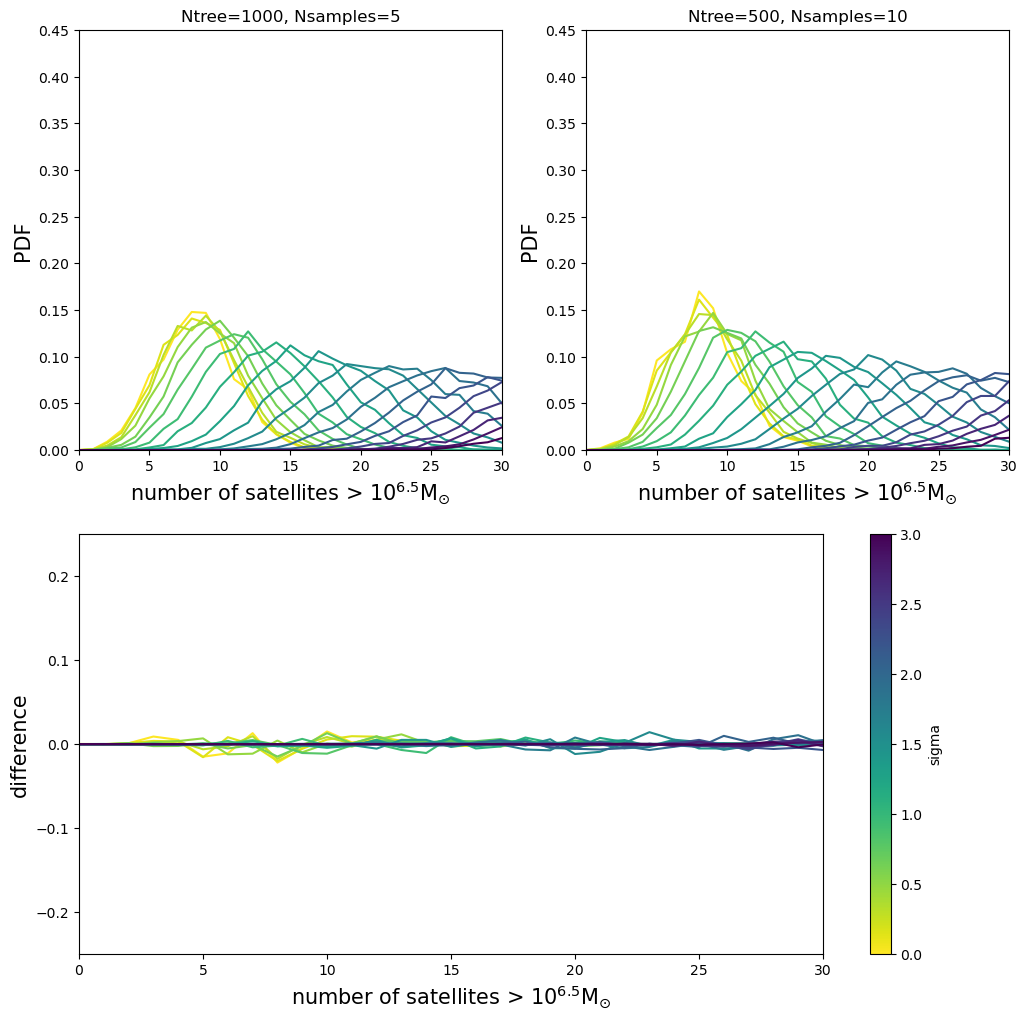

In [59]:
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.title("Ntree="+str(Ntree1)+", Nsamples="+str(Nsigma1))
for i in range(sigma_pix):
    plt.plot(np.arange(pdf_mat1.shape[1]), pdf_mat1[i], color=colors[i])
plt.xlabel("number of satellites > $10^{6.5} \mathrm{M_{\odot}}$", fontsize=15)
plt.ylabel("PDF", fontsize=15)
plt.xlim(0,30)
plt.ylim(0,0.45)

plt.subplot(222)
plt.title("Ntree="+str(Ntree2)+", Nsamples="+str(Nsigma2))
for i in range(sigma_pix):
    plt.plot(np.arange(pdf_mat2.shape[1]), pdf_mat2[i], color=colors[i])
plt.xlabel("number of satellites > $10^{6.5} \mathrm{M_{\odot}}$", fontsize=15)
plt.ylabel("PDF", fontsize=15)
plt.xlim(0,30)
plt.ylim(0,0.45)


plt.subplot(212)
for i in range(sigma_pix):
    plt.plot(np.arange(pdf_mat1.shape[1]), diff[i], color=colors[i])
plt.xlabel("number of satellites > $10^{6.5} \mathrm{M_{\odot}}$", fontsize=15)
plt.ylabel("difference", fontsize=15)
plt.xlim(0,30)
plt.colorbar(cmap, label="sigma")
plt.ylim(-0.25, 0.25)
plt.show()
